In [1]:
import sympy
sympy.init_printing()

In [2]:
# DH 파라미터를 이용해 Homogeneous Transformation Matrix 만드는 함수
def DH(a, alpha, d, theta):
    T_rot_x = sympy.Matrix([[1,0,0,0],
                            [0,sympy.cos(alpha),-sympy.sin(alpha),0],
                            [0,sympy.sin(alpha),sympy.cos(alpha),0],
                            [0,0,0,1]]);
    T_trans_x = sympy.Matrix([[1,0,0,a],
                              [0,1,0,0],
                              [0,0,1,0],
                              [0,0,0,1]]);
    T_trans_z = sympy.Matrix([[1,0,0,0],
                              [0,1,0,0],
                              [0,0,1,d],
                              [0,0,0,1]]);
    T_rot_z = sympy.Matrix([[sympy.cos(theta),-sympy.sin(theta),0,0],
                            [sympy.sin(theta),sympy.cos(theta),0,0],
                            [0,0,1,0],
                            [0,0,0,1]]);
    T = T_rot_x*T_trans_x*T_trans_z*T_rot_z;
    return T

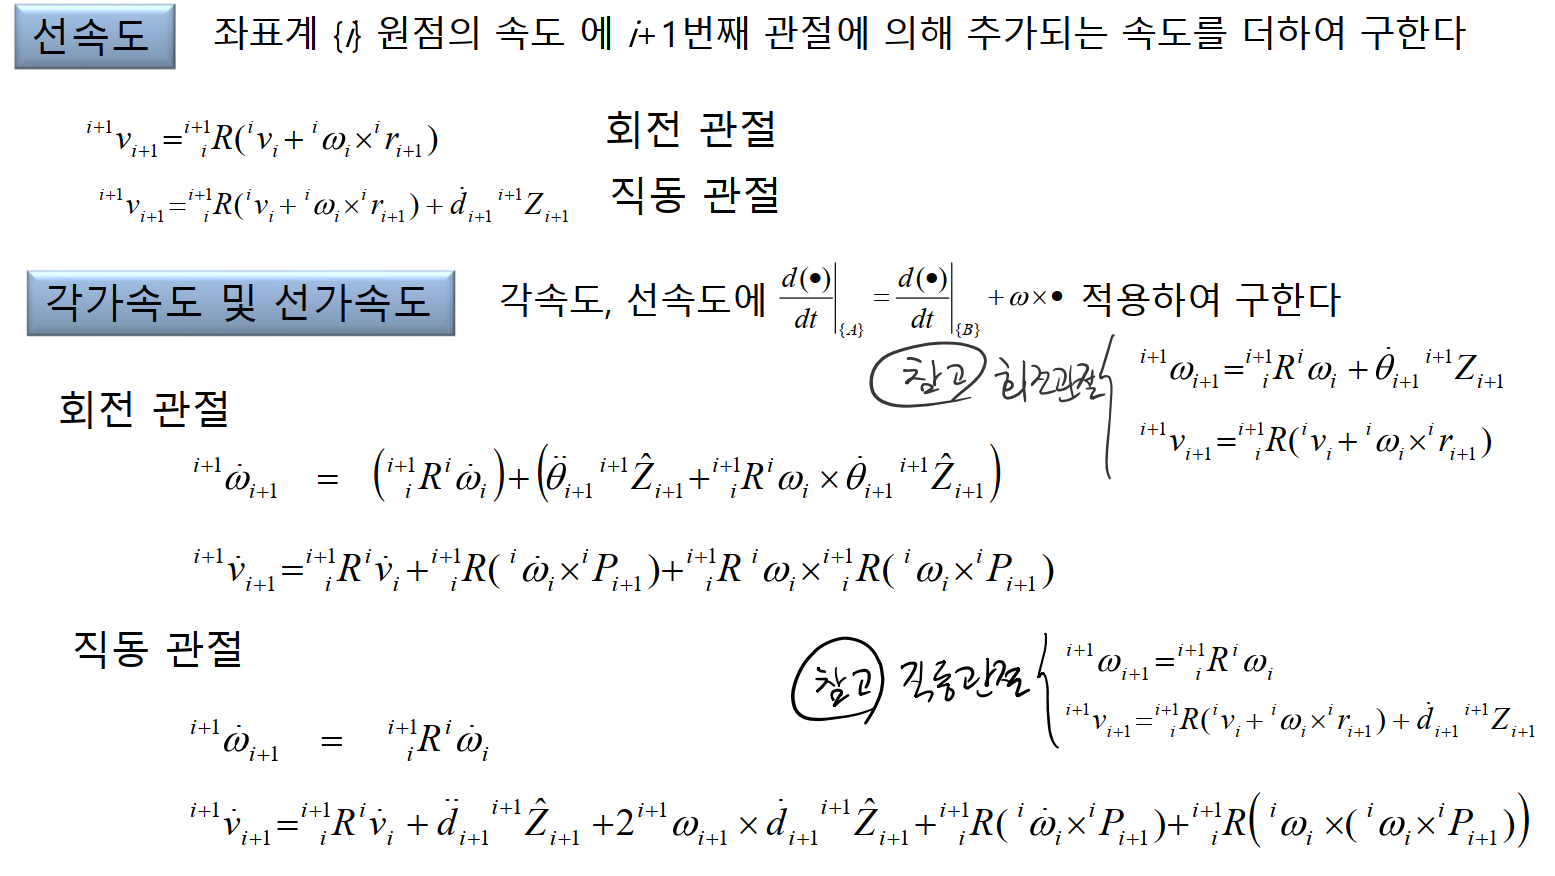

In [3]:
from IPython.display import Image
Image('속도_공식.PNG', width=500)

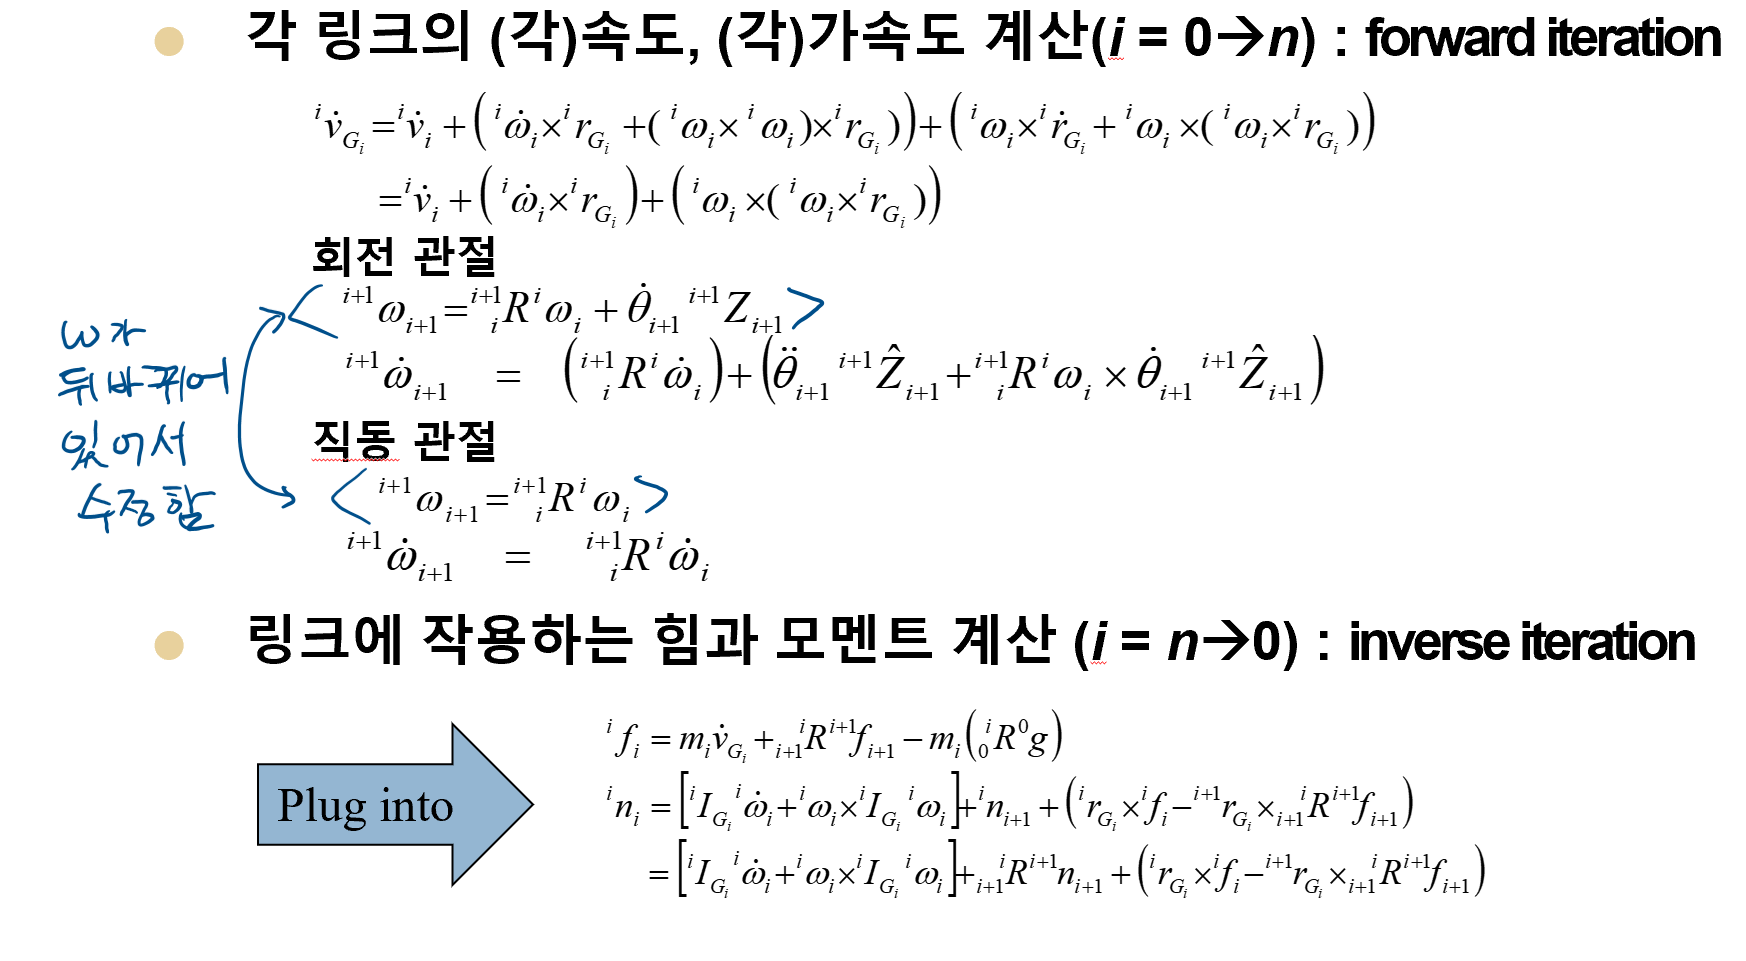

In [4]:
from IPython.display import Image
Image('동역학_공식.PNG', width=500)

In [5]:
###### 동역학 공식
# 동차변환에서 회전행렬만 뽑아내는 함수
def get_R_from_T(T):
    R = T[0:3,0:3];
    return R

# 동차변환에서 위치백터만 뽑아내는 함수
def get_P_from_T(T):
    P = T[0:3,3];
    return P

###### 동역학 1. Forward Iteration
### 회전관절
# 속도전파식을 이용하여 각속도를 구하는 함수
def get_angular_vel_R(T_i_ip1,w_i_i,thd_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    Z_ip1_ip1 = sympy.Matrix([[0],[0],[1]]);
    w_ip1_ip1 = R_ip1_i@w_i_i + thd_ip1*Z_ip1_ip1;
    return w_ip1_ip1    

# 속도전파식을 이용하여 각가속도를 구하는 함수
def get_angular_acc_R(T_i_ip1,w_i_i,wd_i_i,thd_ip1,thdd_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    Z_ip1_ip1 = sympy.Matrix([[0],[0],[1]]);
    w_ip1_i = R_ip1_i@w_i_i; # 이부분이 수정됨.
    wd_ip1_ip1 = R_ip1_i@wd_i_i + thdd_ip1*Z_ip1_ip1 + w_ip1_i.cross(thd_ip1*Z_ip1_ip1);
    return wd_ip1_ip1 

# 속도전파식을 이용하여 선속도를 구하는 함수
def get_linear_vel_R(T_i_ip1,w_i,v_i):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    v_ip1_ip1 = R_ip1_i@(v_i + w_i.cross(r_i_ip1));
    return v_ip1_ip1

# 속도전파식을 이용하여 선가속도를 구하는 함수
def get_linear_acc_R(T_i_ip1,w_i_i,wd_i_i,vd_i):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    w_ip1_i = R_ip1_i@w_i_i; # 이부분이 수정됨.
    vd_ip1_ip1 = R_ip1_i@vd_i + R_ip1_i@(wd_i_i.cross(r_i_ip1)) + w_ip1_i.cross(R_ip1_i@(w_i_i.cross(r_i_ip1)));
    return vd_ip1_ip1

### 직동관절
# 속도전파식을 이용하여 각속도를 구하는 함수
def get_angular_vel_P(T_i_ip1,w_i_i):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    w_ip1_ip1 = R_ip1_i@w_i_i;
    return w_ip1_ip1

# 속도전파식을 이용하여 각가속도를 구하는 함수
def get_angular_acc_P(T_i_ip1,wd_i_i):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    wd_ip1_ip1 = R_ip1_i@wd_i_i;
    return wd_ip1_ip1 

# 속도전파식을 이용하여 선속도를 구하는 함수
def get_linear_vel_P(T_i_ip1,w_i_i,v_i_i,dd_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    Z_ip1_ip1 = sympy.Matrix([[0],[0],[1]]);
    v_ip1_ip1 = R_ip1_i@(v_i_i + w_i_i.cross(r_i_ip1)) + dd_ip1*Z_ip1_ip1;
    return v_ip1_ip1

# 속도전파식을 이용하여 선가속도를 구하는 함수
def get_linear_acc_P(T_i_ip1,w_i_i,wd_i_i,w_ip1_ip1,v_i_i,vd_i_i,dd_ip1,ddd_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    Z_ip1_ip1 = sympy.Matrix([[0],[0],[1]]);
    vd_ip1_ip1 = R_ip1_i@vd_i_i + ddd_ip1*Z_ip1_ip1 + 2*w_ip1_ip1.cross(dd_ip1*Z_ip1_ip1) + R_ip1_i@(wd_i_i.cross(r_i_ip1) + w_i_i.cross(w_i_i.cross(r_i_ip1)));
    return vd_ip1_ip1

### 질량중심
# 질량중심의 가속도 구하는 함수
def get_com_acc(vd_i_i,w_i_i,wd_i_i,r_i_Gi):
    vd_i_Gi = vd_i_i + wd_i_i.cross(r_i_Gi) + w_i_i.cross(w_i_i.cross(r_i_Gi));
    return vd_i_Gi

# 선속도와 각속도를 입력으로 받아 자코비안을 구하는 함수
def get_Jacobian(v_0_n,w_0_n,q):
    J = sympy.zeros(6,len(q));
    i = 0;
    for q_i in q:
        j_i = [];
        j_i.append(sympy.simplify(sympy.diff(v_0_n,q_i)));
        j_i.append(sympy.simplify(sympy.diff(w_0_n,q_i)));
        J[:,i] = sympy.Matrix(j_i);
        i+=1;
    return J

###### 동역학 2. Inverse Iteration
# 동역학 - 힘 구하는 공식
def get_force_i(T_i_ip1,T_0_i,m_i,g_0,vd_i_Gi,f_ip1_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_0_i = get_R_from_T(T_0_i);
    R_i_0 = sympy.transpose(R_0_i);
    f_i_i = m_i*vd_i_Gi + R_i_ip1@f_ip1_ip1 - m_i*R_i_0*g_0;
    return sympy.simplify(f_i_i)

# 동역학 - 토크 구하는 공식
def get_torque_i(T_i_ip1,n_ip1_ip1,f_i_i,f_ip1_ip1,w_i_i,wd_i_i,r_i_Gi,I_i_Gi):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    r_ip1_Gi = r_i_Gi - r_i_ip1;   
    n_i_i = I_i_Gi@wd_i_i + w_i_i.cross(I_i_Gi@w_i_i) + R_i_ip1@n_ip1_ip1 + r_i_Gi.cross(f_i_i) - r_ip1_Gi.cross(R_i_ip1@f_ip1_ip1);
    return sympy.simplify(n_i_i)

###### 머니퓰레이터 운동방적식
def get_EoM_from_T(tau,qdd,g):
    # Inertia Matrix, M(q)를 구해주는 부분
    M = sympy.zeros(len(tau));
    i = 0;
    for tau_i in tau:
        M_i = [];
        M_i.append(sympy.simplify(sympy.diff(tau_i,qdd)));
        M[:,i] = sympy.Matrix(M_i);
        i+=1;

    # Gravity Matrix, G(q) 를 구해주는 부분
    G = sympy.zeros(len(tau),1);
    i = 0;
    for tau_i in tau:
        G_i = [];
        G_i.append(sympy.simplify(sympy.diff(tau_i,g)));
        G[i] = sympy.Matrix(G_i);
        i+=1;
        
    # 원심력 & 코리올리스 행렬, C(q,qd) 를 구해주는 부분
    C = sympy.simplify(tau - M@qdd - G*g);
    
    return M, C, G

## 예제 5.2

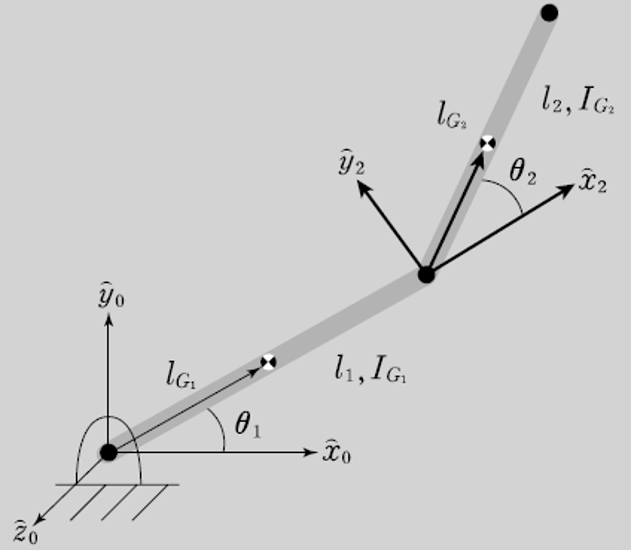

In [6]:
from IPython.display import Image
Image('예제5.2.PNG', width=300)

In [7]:
th1,th1d,th1dd,th2,th2d,th2dd,L1,LG1,L2,LG2,IG1,IG2,m1,m2 = sympy.symbols('th1,th1d,th1dd,th2,th2d,th2dd,L1,LG1,L2,LG2,IG1,IG2,m1,m2')

In [8]:
# DH Parameter

In [9]:
T01 = DH(0,0,0,th1)

In [10]:
T12 = DH(L1,0,0,th2)

In [11]:
T23 = DH(L2,0,0,0)

In [12]:
T01, T12, T23

⎛⎡cos(th₁)  -sin(th₁)  0  0⎤  ⎡cos(th₂)  -sin(th₂)  0  L₁⎤  ⎡1  0  0  L₂⎤⎞
⎜⎢                         ⎥  ⎢                          ⎥  ⎢           ⎥⎟
⎜⎢sin(th₁)  cos(th₁)   0  0⎥  ⎢sin(th₂)  cos(th₂)   0  0 ⎥  ⎢0  1  0  0 ⎥⎟
⎜⎢                         ⎥, ⎢                          ⎥, ⎢           ⎥⎟
⎜⎢   0          0      1  0⎥  ⎢   0          0      1  0 ⎥  ⎢0  0  1  0 ⎥⎟
⎜⎢                         ⎥  ⎢                          ⎥  ⎢           ⎥⎟
⎝⎣   0          0      0  1⎦  ⎣   0          0      0  1 ⎦  ⎣0  0  0  1 ⎦⎠

In [13]:
T03 = sympy.simplify(T01*T12*T23)

In [14]:
T03

⎡cos(th₁ + th₂)  -sin(th₁ + th₂)  0  L₁⋅cos(th₁) + L₂⋅cos(th₁ + th₂)⎤
⎢                                                                   ⎥
⎢sin(th₁ + th₂)  cos(th₁ + th₂)   0  L₁⋅sin(th₁) + L₂⋅sin(th₁ + th₂)⎥
⎢                                                                   ⎥
⎢      0                0         1                 0               ⎥
⎢                                                                   ⎥
⎣      0                0         0                 1               ⎦

In [15]:
# Forward Iteration

In [16]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = get_angular_vel_R(T01,w_0_0,th1d)
w_2_2 = get_angular_vel_R(T12,w_1_1,th2d)

In [17]:
w_1_1,w_2_2

⎛⎡ 0  ⎤  ⎡     0     ⎤⎞
⎜⎢    ⎥  ⎢           ⎥⎟
⎜⎢ 0  ⎥, ⎢     0     ⎥⎟
⎜⎢    ⎥  ⎢           ⎥⎟
⎝⎣th1d⎦  ⎣th1d + th2d⎦⎠

In [18]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = get_linear_vel_R(T12,w_1_1,v_1_1)

In [19]:
v_1_1,v_2_2

⎛⎡0⎤  ⎡L₁⋅th1d⋅sin(th₂)⎤⎞
⎜⎢ ⎥  ⎢                ⎥⎟
⎜⎢0⎥, ⎢L₁⋅th1d⋅cos(th₂)⎥⎟
⎜⎢ ⎥  ⎢                ⎥⎟
⎝⎣0⎦  ⎣       0        ⎦⎠

In [20]:
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = get_angular_acc_R(T01,w_0_0,wd_0_0,th1d,th1dd)
wd_2_2 = get_angular_acc_R(T12,w_1_1,wd_1_1,th2d,th2dd)

In [21]:
wd_0_0,wd_1_1,wd_2_2

⎛⎡0⎤  ⎡  0  ⎤  ⎡      0      ⎤⎞
⎜⎢ ⎥  ⎢     ⎥  ⎢             ⎥⎟
⎜⎢0⎥, ⎢  0  ⎥, ⎢      0      ⎥⎟
⎜⎢ ⎥  ⎢     ⎥  ⎢             ⎥⎟
⎝⎣0⎦  ⎣th1dd⎦  ⎣th1dd + th2dd⎦⎠

In [22]:
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = get_linear_acc_R(T12,w_1_1,wd_1_1,vd_1_1)

In [23]:
vd_0_0,vd_1_1,vd_2_2

⎛          ⎡         2                             ⎤⎞
⎜⎡0⎤  ⎡0⎤  ⎢- L₁⋅th1d ⋅cos(th₂) + L₁⋅th1dd⋅sin(th₂)⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢                                       ⎥⎟
⎜⎢0⎥, ⎢0⎥, ⎢        2                              ⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ L₁⋅th1d ⋅sin(th₂) + L₁⋅th1dd⋅cos(th₂) ⎥⎟
⎜⎣0⎦  ⎣0⎦  ⎢                                       ⎥⎟
⎝          ⎣                   0                   ⎦⎠

In [24]:
r_1_G1 = sympy.Matrix([[LG1],[0],[0]])
r_2_G2 = sympy.Matrix([[LG2],[0],[0]])
vd_1_G1 = get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)

In [25]:
vd_1_G1,vd_2_G2

⎛⎡         2⎤  ⎡         2                                                 2⎤⎞
⎜⎢-LG₁⋅th1d ⎥  ⎢- L₁⋅th1d ⋅cos(th₂) + L₁⋅th1dd⋅sin(th₂) - LG₂⋅(th1d + th2d) ⎥⎟
⎜⎢          ⎥  ⎢                                                            ⎥⎟
⎜⎢LG₁⋅th1dd ⎥, ⎢       2                                                    ⎥⎟
⎜⎢          ⎥  ⎢L₁⋅th1d ⋅sin(th₂) + L₁⋅th1dd⋅cos(th₂) + LG₂⋅(th1dd + th2dd) ⎥⎟
⎜⎣    0     ⎦  ⎢                                                            ⎥⎟
⎝              ⎣                             0                              ⎦⎠

In [26]:
# Inverse Iteration

In [27]:
g = sympy.symbols('g')

In [28]:
f_3_3 = sympy.Matrix([[0],[0],[0]])
n_3_3 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[-g],[0]])

In [29]:
f_2_2 = get_force_i(T23,T01@T12,m2,g_0,vd_2_G2,f_3_3)

In [30]:
f_1_1 = get_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [31]:
f_1_1,f_2_2

⎛⎡            2              2              2                                 
⎜⎢- L₁⋅m₂⋅th1d  - LG₁⋅m₁⋅th1d  - LG₂⋅m₂⋅th1d ⋅cos(th₂) - 2⋅LG₂⋅m₂⋅th1d⋅th2d⋅co
⎜⎢                                                                            
⎜⎢                                         2                                  
⎜⎢ L₁⋅m₂⋅th1dd + LG₁⋅m₁⋅th1dd - LG₂⋅m₂⋅th1d ⋅sin(th₂) - 2⋅LG₂⋅m₂⋅th1d⋅th2d⋅sin
⎜⎢                                                                            
⎝⎣                                                                            

                                            2                                 
s(th₂) - LG₂⋅m₂⋅th1dd⋅sin(th₂) - LG₂⋅m₂⋅th2d ⋅cos(th₂) - LG₂⋅m₂⋅th2dd⋅sin(th₂)
                                                                              
                                           2                                  
(th₂) + LG₂⋅m₂⋅th1dd⋅cos(th₂) - LG₂⋅m₂⋅th2d ⋅sin(th₂) + LG₂⋅m₂⋅th2dd⋅cos(th₂) 
                                                   

In [32]:
Ix1,Iy1,Iz1,Ix2,Iy2,Iz2 = sympy.symbols('Ix1,Iy1,Iz1,Ix2,Iy2,Iz2')
I_1_G1 = sympy.Matrix([[Ix1,0,0],[0,Iy1,0],[0,0,Iz1]])
I_2_G2 = sympy.Matrix([[Ix2,0,0],[0,Iy2,0],[0,0,Iz2]])

In [33]:
# get_torque_i(T_i_ip1,n_ip1_ip1,f_i_i,f_ip1_ip1,w_i_i,wd_i_i,r_i_Gi,I_i_Gi)
n_2_2 = get_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = get_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [34]:
n_1_1,n_2_2

⎛⎡                                                                            
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢                                      2                                     
⎝⎣Iz₁⋅th1dd + Iz₂⋅th1dd + Iz₂⋅th2dd + L₁ ⋅m₂⋅th1dd - 2⋅L₁⋅LG₂⋅m₂⋅th1d⋅th2d⋅sin

                                                              0               
                                                                              
                                                              0               
                                                                              
                                                   2                          
(th₂) + 2⋅L₁⋅LG₂⋅m₂⋅th1dd⋅cos(th₂) - L₁⋅LG₂⋅m₂⋅th2d ⋅sin(th₂) + L₁⋅LG₂⋅m₂⋅th2d

                                                  

In [35]:
# Get Equation of Motion

In [36]:
tau = sympy.Matrix([[n_1_1[2]],[n_2_2[2]]])

In [37]:
tau

⎡                                      2                                      
⎢Iz₁⋅th1dd + Iz₂⋅th1dd + Iz₂⋅th2dd + L₁ ⋅m₂⋅th1dd - 2⋅L₁⋅LG₂⋅m₂⋅th1d⋅th2d⋅sin(
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                  2                           
th₂) + 2⋅L₁⋅LG₂⋅m₂⋅th1dd⋅cos(th₂) - L₁⋅LG₂⋅m₂⋅th2d ⋅sin(th₂) + L₁⋅LG₂⋅m₂⋅th2dd
                                                                              
                                    ⎛       2                                 
       Iz₂⋅(th1dd + th2dd) + LG₂⋅m₂⋅⎝L₁⋅th1d ⋅sin(th₂) + L₁⋅th1dd⋅cos(th₂) + L

                                  2                                   2       
⋅cos(th₂) + L₁⋅g⋅m₂⋅cos(th₁) + LG₁ ⋅m₁⋅th1dd + LG₁⋅g⋅m₁⋅cos(th₁) + LG₂ ⋅m₂⋅th1
                                                  

In [38]:
qdd = sympy.Matrix([[th1dd],[th2dd]])
M_, C_, G_ = get_EoM_from_T(tau,qdd,g)

In [39]:
M_

⎡              2                                2         2                   
⎢Iz₁ + Iz₂ + L₁ ⋅m₂ + 2⋅L₁⋅LG₂⋅m₂⋅cos(th₂) + LG₁ ⋅m₁ + LG₂ ⋅m₂  Iz₂ + LG₂⋅m₂⋅(
⎢                                                                             
⎢                                           2                                 
⎣             Iz₂ + L₁⋅LG₂⋅m₂⋅cos(th₂) + LG₂ ⋅m₂                         Iz₂ +

                  ⎤
L₁⋅cos(th₂) + LG₂)⎥
                  ⎥
    2             ⎥
 LG₂ ⋅m₂          ⎦

In [40]:
C_

⎡-L₁⋅LG₂⋅m₂⋅th2d⋅(2⋅th1d + th2d)⋅sin(th₂)⎤
⎢                                        ⎥
⎢                      2                 ⎥
⎣        L₁⋅LG₂⋅m₂⋅th1d ⋅sin(th₂)        ⎦

In [41]:
sympy.simplify(G_)

⎡L₁⋅m₂⋅cos(th₁) + LG₁⋅m₁⋅cos(th₁) + LG₂⋅m₂⋅cos(th₁ + th₂)⎤
⎢                                                        ⎥
⎣                 LG₂⋅m₂⋅cos(th₁ + th₂)                  ⎦